In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium

Solving environment: done

# All requested packages already installed.



#### Importing Dataframes from previous Notebooks

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
# The code was removed by Watson Studio for sharing.

In [4]:
# read newyork_grouped.csv to dataframe
newyork_grouped.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Christmas Market,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Basketball Court,College Bookstore,College Cafeteria,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Hunan Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Offic

In [5]:
# read toronto_grouped.csv to dataframe
toronto_grouped.head()

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,"Adelaide, King, Richmond",0.000000,0.0,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.02,0.0,0.0,0.010000,0.0,0.03,0.0,0.000000,0.000000,0.0,0.000000,0.030000,0.0,0.040000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0000,0.02,0.0,0.01,0.030000,0.000000,0.0,0.01,0.03,0.010000,0.0,0.000000,0.040000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.070000,0.0,0.0,0.0,0.0,0.01,0.000000,0.000000,0.020000,0.000000,0.03,0.0,0.000000,0.0,0.0,0.0,0.01,0.010000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.01,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.01,0.0,0.000000,0.000000,0.0,0.0,0.0,0.010000,0.0,0.000000,0.000000,0.0,0.02,0.0,0.0,0.01,0.0,0.01,0.01,0.000000,0.000000,0.000000,

#### Merge New York and Toronto data in order to perform clustering

In [6]:
L1 = list(newyork_grouped.columns)
L2 = list(toronto_grouped.columns)
L=list(set(L1).intersection(L2))

df=pd.merge(newyork_grouped,toronto_grouped, on=L,how='outer')
cols = [col for col in df.columns if col not in L]
df=df.drop(cols,axis=1)
df.head()

,Neighborhood,Afghan Restaurant,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Colombian Restaurant,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Post Office,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,Allerton,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.066667,0.066667,0.033333,0.0,0.0,0.033333,0.0,0.033333,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.000000,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.033333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.033333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.133333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Annadale,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0

#### Implement PCA in order to reduce dimensionality

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

neigh_name = df['Neighborhood']
df_grouped_clustering = df.drop('Neighborhood', 1)

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(df_grouped_clustering)

pca = PCA().fit(data_rescaled)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.yticks(np.arange(0, 1.0, step=0.05))

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

<Figure size 800x600 with 1 Axes>

In [8]:
pca = PCA(n_components=150)
dataset = pca.fit_transform(data_rescaled)

#### Elbow method 

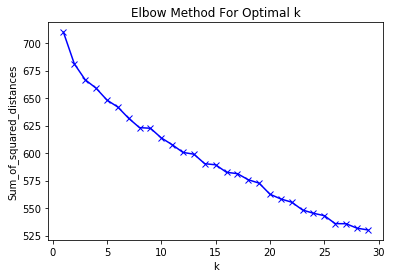

In [9]:
Sum_of_squared_distances = []
K = range(1, 30)
for kclusters in K:
    km = KMeans(n_clusters=kclusters, init='k-means++', n_init=10, max_iter=300, tol=0.001,  random_state=4).fit(dataset)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### Silhouette score method

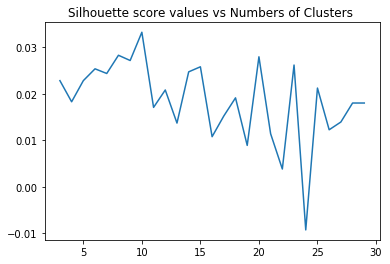

Optimal number of components is:
10


In [10]:
import numpy as numpy
import sklearn
import matplotlib.pyplot as plt
 
obs = dataset.copy() 
silhouette_score_values=list()
NumberOfClusters=range(3,30)
 
for i in NumberOfClusters:
    classifier=KMeans(i,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=10)
    classifier.fit(obs)
    labels= classifier.predict(obs)
    silhouette_score_values.append(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', random_state=0))
 
plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()
 
No_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print("Optimal number of components is:")
print(No_Components)

In [11]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [12]:
num_top_venues = 7
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neigh_sorted = pd.DataFrame(columns=columns)
neigh_sorted['Neighborhood'] = df['Neighborhood']

for ind in np.arange(df.shape[0]):
    neigh_sorted.iloc[ind, 1:] = return_most_common_venues(df.iloc[ind, :], num_top_venues)

neigh_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Allerton,Pizza Place,Chinese Restaurant,Deli / Bodega,Department Store,Supermarket,Pharmacy,Breakfast Spot
1,Annadale,Bakery,Sushi Restaurant,Park,Diner,Pizza Place,Train Station,Restaurant
2,Arden Heights,Pizza Place,Coffee Shop,Pharmacy,Discount Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant
3,Arlington,Grocery Store,Boat or Ferry,Coffee Shop,Deli / Bodega,Yoga Studio,Donut Shop,Filipino Restaurant
4,Arrochar,Deli / Bodega,Italian Restaurant,Hotel,Mediterranean Restaurant,Cosmetics Shop,Pizza Place,Sandwich Place


In [13]:
df_grouped_clustering = dataset.copy()
df_grouped_clustering

array([[-0.37098374,  0.0238273 ,  0.05489841, ..., -0.01598015,
        -0.05246882,  0.05964276],
       [-0.09452382, -0.03108329, -0.16881397, ..., -0.02374401,
        -0.0204365 , -0.03189417],
       [-0.13188629,  0.05291151, -0.15473746, ...,  0.0634066 ,
        -0.01235974, -0.04564865],
       ...,
       [-0.05643716, -0.44051706, -0.13218414, ..., -0.06474644,
        -0.07878918, -0.05851492],
       [ 0.06558743,  0.08485859,  0.44557983, ...,  0.06005406,
         0.01519982, -0.01753003],
       [ 0.21082825,  0.19664205,  0.31439627, ...,  0.02289414,
        -0.10561558,  0.19080586]])

## Performing K-Means Clustering

In [14]:
# set number of clusters
kclusters = 10

kmeans = KMeans(n_clusters=kclusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=2, copy_x=True).fit(df_grouped_clustering)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [15]:
df_cluster = df.copy()
df_cluster.insert(0, 'Cluster_Labels', kmeans.labels_)
df_cluster.head()

,Cluster_Labels,Neighborhood,Afghan Restaurant,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Colombian Restaurant,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Post Office,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,1,Allerton,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.066667,0.066667,0.033333,0.0,0.0,0.033333,0.0,0.033333,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.000000,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.033333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.033333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.133333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Annadale,0.0,0.0,0.000000,0.0,0.0

In [16]:
df_cluster_and_neighborhood = df_cluster[['Cluster_Labels', 'Neighborhood']]

#### Appending New York data and Toronto data with respective cluster labels

In [17]:
# The code was removed by Watson Studio for sharing.

In [18]:
# Read newyork_data.csv to dataframe
newyork_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [19]:
# Read toronto_data.csv to dataframe
toronto_data.rename(columns={'Neighbourhood':'Neighborhood'}, inplace=True)
toronto_data.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494


In [20]:
print('NY_data shape: ', newyork_data.shape)
print('Toronto_data shape: ', toronto_data.shape)

NY_data shape:  (306, 4)
Toronto_data shape:  (103, 5)


In [21]:
NY_merged = newyork_data[['Neighborhood', 'Latitude', 'Longitude']]
NY_merged = NY_merged.merge(df_cluster_and_neighborhood, on = 'Neighborhood', how = 'left')
NY_merged.dropna(inplace = True)
NY_merged.head()

,Neighborhood,Latitude,Longitude,Cluster_Labels
0,Wakefield,40.894705,-73.847201,1.0
1,Co-op City,40.874294,-73.829939,3.0
2,Eastchester,40.887556,-73.827806,9.0
3,Fieldston,40.895437,-73.905643,2.0
4,Riverdale,40.890834,-73.912585,2.0


In [22]:
Toronto_merged = toronto_data[['Neighborhood', 'Latitude', 'Longitude']]
Toronto_merged = Toronto_merged.merge(df_cluster_and_neighborhood, on = 'Neighborhood', how = 'left')
Toronto_merged.dropna(inplace = True)
Toronto_merged.head()

,Neighborhood,Latitude,Longitude,Cluster_Labels
2,Harbourfront,43.654260,-79.360636,4.0
4,Queen's Park,43.662301,-79.389494,4.0
5,Queen's Park,43.667856,-79.532242,4.0
9,"Ryerson, Garden District",43.657162,-79.378937,4.0
15,St. James Town,43.651494,-79.375418,4.0


#### Visualizing New York City clusters

In [23]:
address_NY = 'Manhattan, NY'

geolocator = Nominatim(user_agent="NY_explorer")
location = geolocator.geocode(address_NY)
latitude_NY = location.latitude
longitude_NY = location.longitude
print('The geograpical coordinate of Detroit,MI are {}, {}.'.format(latitude_NY, longitude_NY))

The geograpical coordinate of Detroit,MI are 40.7896239, -73.9598939.


In [24]:
map_newyork = folium.Map(location=[latitude_NY, longitude_NY], zoom_start= 12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NY_merged['Latitude'], NY_merged['Longitude'], NY_merged['Neighborhood'], NY_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + " "  + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_newyork)
       
map_newyork

#### Visualize Toronto City Clusters

In [25]:
address_can = 'East York, Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address_can)
latitude_tor = location.latitude
longitude_tor = location.longitude
print('The geograpical coordinate of Detroit,MI are {}, {}.'.format(latitude_tor, longitude_tor))

The geograpical coordinate of Detroit,MI are 43.699971000000005, -79.33251996261595.


In [26]:
map_toronto = folium.Map(location=[latitude_tor, longitude_tor], zoom_start= 11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Latitude'], Toronto_merged['Longitude'], Toronto_merged['Neighborhood'], Toronto_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + " "  + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_toronto)
       
map_toronto

In [27]:
df_merged = pd.concat([NY_merged, Toronto_merged])
df_merged.head()

,Neighborhood,Latitude,Longitude,Cluster_Labels
0,Wakefield,40.894705,-73.847201,1.0
1,Co-op City,40.874294,-73.829939,3.0
2,Eastchester,40.887556,-73.827806,9.0
3,Fieldston,40.895437,-73.905643,2.0
4,Riverdale,40.890834,-73.912585,2.0


In [29]:
neigh_sorted = neigh_sorted.merge(df_cluster_and_neighborhood, on = 'Neighborhood', how = 'right')
neigh_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,Cluster_Labels
0,Allerton,Pizza Place,Chinese Restaurant,Deli / Bodega,Department Store,Supermarket,Pharmacy,Breakfast Spot,1
1,Annadale,Bakery,Sushi Restaurant,Park,Diner,Pizza Place,Train Station,Restaurant,1
2,Arden Heights,Pizza Place,Coffee Shop,Pharmacy,Discount Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,1
3,Arlington,Grocery Store,Boat or Ferry,Coffee Shop,Deli / Bodega,Yoga Studio,Donut Shop,Filipino Restaurant,2
4,Arrochar,Deli / Bodega,Italian Restaurant,Hotel,Mediterranean Restaurant,Cosmetics Shop,Pizza Place,Sandwich Place,2


#### Cluster 1

In [30]:
neigh_sorted.loc[neigh_sorted['Cluster_Labels'] == 0, neigh_sorted.columns[[0] + list(range(1, neigh_sorted.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,Cluster_Labels
12,Bay Terrace,Clothing Store,Shoe Store,Donut Shop,Supermarket,Women's Store,Lingerie Store,Cosmetics Shop,0
13,Baychester,Donut Shop,Pet Store,Bank,Pizza Place,Playground,Rental Car Location,Discount Store,0
62,Concord,Gym / Fitness Center,Bagel Shop,Coffee Shop,Deli / Bodega,Cosmetics Shop,Supermarket,Park,0
64,Concourse Village,Sandwich Place,Mexican Restaurant,Fast Food Restaurant,Sporting Goods Shop,Convenience Store,Fried Chicken Joint,Supermarket,0
70,Ditmas Park,Deli / Bodega,Caribbean Restaurant,Pizza Place,Donut Shop,Burger Joint,Discount Store,Yoga Studio,0
76,East Elmhurst,Donut Shop,Gas Station,Coffee Shop,Ice Cream Shop,Hotel Bar,Supermarket,Café,0
84,Edenwald,Fish Market,Grocery Store,Gas Station,Supermarket,Dog Run,Filipino Restaurant,Fast Food Restaurant,0
131,Holliswood,Playground,Sandwich Place,Gas Station,Supermarket,Donut Shop,Yoga Studio,Discount Store,0
149,Lefrak City,Cosmetics Shop,Department Store,Bakery,Supermarket,Fruit & Vegetable Store,Bubble Tea Shop,Shopping Mall,0
184,Mount Hope,Supermarket,Grocery Store,Metro Station,Ice Cream Shop,Chinese Restaurant,Sandwich Place,Donut Shop,0


#### Cluster 2

In [32]:
neigh_sorted.loc[neigh_sorted['Cluster_Labels'] == 1, neigh_sorted.columns[[0] + list(range(1, neigh_sorted.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,Cluster_Labels
0,Allerton,Pizza Place,Chinese Restaurant,Deli / Bodega,Department Store,Supermarket,Pharmacy,Breakfast Spot,1
1,Annadale,Bakery,Sushi Restaurant,Park,Diner,Pizza Place,Train Station,Restaurant,1
2,Arden Heights,Pizza Place,Coffee Shop,Pharmacy,Discount Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,1
5,Arverne,Metro Station,Sandwich Place,Donut Shop,Pizza Place,Playground,Coffee Shop,Board Shop,1
9,Bath Beach,Chinese Restaurant,Pharmacy,Pizza Place,Fast Food Restaurant,Sushi Restaurant,Donut Shop,Bubble Tea Shop,1
11,Bay Ridge,Italian Restaurant,Spa,Bar,Greek Restaurant,Chinese Restaurant,American Restaurant,Pizza Place,1
16,Bedford Park,Diner,Chinese Restaurant,Deli / Bodega,Pizza Place,Sandwich Place,Supermarket,Mexican Restaurant,1
18,Beechhurst,Chinese Restaurant,Deli / Bodega,Boutique,Italian Restaurant,Supermarket,Donut Shop,Dessert Shop,1
20,Belle Harbor,Beach,Spa,Deli / Bodega,Pub,Pharmacy,Bagel Shop,Boutique,1
22,Belmont,Italian Restaurant,Deli / Bodega,Pizza Place,Bakery,Dessert Shop,Donut Shop,Bank,1


#### Cluster 3

In [33]:
neigh_sorted.loc[neigh_sorted['Cluster_Labels'] == 2, neigh_sorted.columns[[0] + list(range(1, neigh_sorted.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,Cluster_Labels
3,Arlington,Grocery Store,Boat or Ferry,Coffee Shop,Deli / Bodega,Yoga Studio,Donut Shop,Filipino Restaurant,2
4,Arrochar,Deli / Bodega,Italian Restaurant,Hotel,Mediterranean Restaurant,Cosmetics Shop,Pizza Place,Sandwich Place,2
19,Bellaire,Chinese Restaurant,Convenience Store,Breakfast Spot,Greek Restaurant,Italian Restaurant,Deli / Bodega,Coffee Shop,2
24,Bergen Beach,Harbor / Marina,Playground,Athletics & Sports,Donut Shop,Dog Run,Filipino Restaurant,Fast Food Restaurant,2
25,Blissville,Hotel,Donut Shop,Deli / Bodega,Bar,Sporting Goods Shop,Electronics Store,Intersection,2
26,Bloomfield,Discount Store,Park,Dog Run,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,2
29,Breezy Point,Trail,Beach,Monument / Landmark,Yoga Studio,Dog Run,Fast Food Restaurant,Farmers Market,2
36,Brookville,Deli / Bodega,Yoga Studio,Dog Run,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,2
37,Brownsville,Restaurant,Park,Chinese Restaurant,Playground,Food,Fried Chicken Joint,Discount Store,2
40,Butler Manor,Pool,Convenience Store,Yoga Studio,Dog Run,Filipino Restaurant,Fast Food Restaurant,Farmers Market,2


#### Cluster 4

In [34]:
neigh_sorted.loc[neigh_sorted['Cluster_Labels'] == 3, neigh_sorted.columns[[0] + list(range(1, neigh_sorted.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,Cluster_Labels
7,Astoria Heights,Liquor Store,Plaza,Italian Restaurant,Shopping Mall,Bakery,Hostel,Supermarket,3
21,Bellerose,Pizza Place,Italian Restaurant,Chinese Restaurant,Pub,Gas Station,Seafood Restaurant,Salon / Barbershop,3
41,Cambria Heights,Caribbean Restaurant,Cosmetics Shop,Nightclub,Liquor Store,Chinese Restaurant,Pharmacy,Dance Studio,3
54,Claremont Village,Grocery Store,Chinese Restaurant,Pizza Place,Bakery,Park,Food,Supermarket,3
59,Co-op City,Pharmacy,Bagel Shop,Gift Shop,Ice Cream Shop,Fast Food Restaurant,Liquor Store,Discount Store,3
63,Concourse,Grocery Store,Fried Chicken Joint,Clothing Store,Rental Car Location,Supermarket,Ice Cream Shop,Caribbean Restaurant,3
65,Coney Island,Monument / Landmark,Caribbean Restaurant,Baseball Stadium,Pharmacy,Skating Rink,Liquor Store,Farmers Market,3
66,Corona,Mexican Restaurant,Convenience Store,Bakery,Sandwich Place,Italian Restaurant,Donut Shop,Restaurant,3
96,Flatbush,Coffee Shop,Caribbean Restaurant,Chinese Restaurant,Mexican Restaurant,Donut Shop,Liquor Store,Bank,3
119,Great Kills,Bar,Pizza Place,Italian Restaurant,Pharmacy,Japanese Restaurant,Food & Drink Shop,Liquor Store,3
